### Perceptron Trick(The method mentioned below is not the best one ,for our kind info)

##### For training a perceptron we need to find a line which correctly classifies the two classes.For finding the line ,we use general eqn of line i.e Ax+By+C=0.So, to find this line ,we use perecptron trick.

##### In this method ,intially we start from random values of A,B and C ,say A=1,B=1 and C=0 and imagine a test line satisfying this points.After that we set up a loop which runs for 1000 epochs(depend on user ..but 1000 is enough for completion of operation).In the loop ,we randomly select a point in the dataset and check if it is correctly classified or not,i.e positive class should be above line and negative should be below the line.If the point is positive and is correctly classifies,we left the line as it is and if it is inccorectly classified , the line is pulled towards that point such that it becomes correctly classified.By repeating this process in loop, we finally get the line and values of A,B ,C.

##### To identify whether the point is in positive or negative region of line ,we put the co-ordinates of line in eqn Ax+By+C>0.It if satisfies, the the point is in positive region of line ,else in negative region.

### How to get New Line??

##### For the misclassified point,we take the co-ordinates of the point and add 1 to it as Z-coordinate point.For e.g if co-ordinates were (4,5)we write it as (4,5,1)and then subtract this co-ordinates from the values of A,B and C with learning rate multiplied to each i.e A-lr*x,B-lr*y and C-lr*z,if we r moving towards positive region i.e point is in positve region . If we r moving towards negative region i.e missclassified point is in negative region, then we add these co-ordinates with learning rate multiplied to it i.e A+lr*x,B+lr*y,C+lr*z.After calculating this,we now have new co-ordinates fo line i.e new values of A,B and C.Learning rate can be 0.001 or 0.01

##### We can add a new column in our dataset named as X0 such that it has all values equal to 1(required for calculating new values of coeff) and on the basis of that we can redefine our eqn by using W in place of A,B and C --> W0X0+W1X1+W2X2+... i.e summatio of 1 to n (WiXi)

##### Simplified condition for each point is --> Wnew=Wold + lr*(y-yhat)Xi

In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [2]:
import matplotlib.pyplot as plt

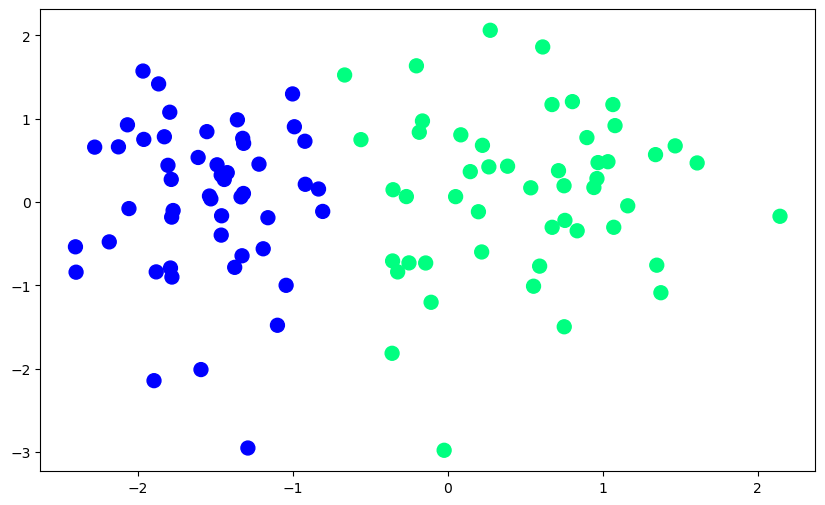

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [5]:
def perceptron(X,y):
    #Adding column x0
    X=np.insert(X,0,1,axis=1)
    #Initializing weights array
    weights=np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j=np.random.randint(0,100)
        #Calculating the value predicted by my model
        y_hat=step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        return weights[0],weights[1:]
        
    

In [6]:
def step(z):
    return 1 if z>0 else 0

In [7]:
intercept_,coef_ = perceptron(X,y)

In [8]:
print(coef_)
print(intercept_)

[1.13557815 0.90134592]
0.9


In [9]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [10]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

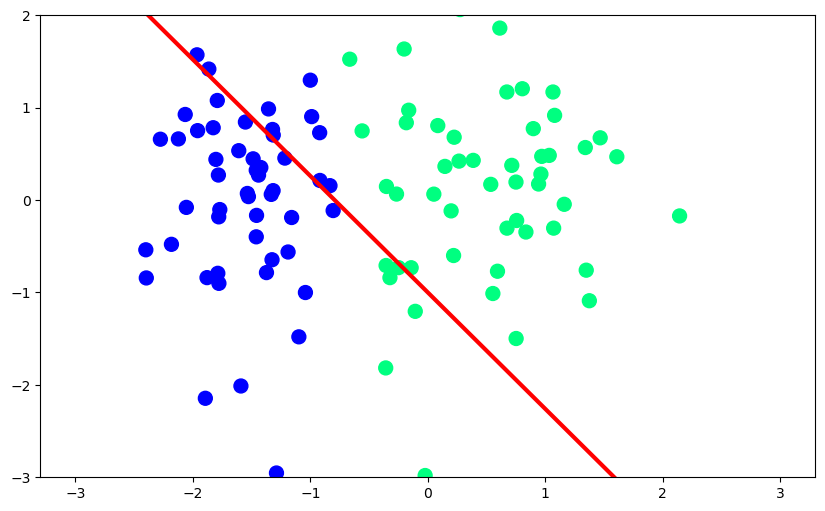

In [11]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)